In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from collections import Counter
from sklearn import metrics 
%matplotlib inline

### prepare the data 

In [3]:
df=pd.read_csv("./heart.csv")
df.drop_duplicates(inplace=True)


In [4]:
X=df.drop("target",axis=1)
y=df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


In [5]:
#test if the data is splitted correctly
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({0: 113, 1: 128})

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### KNN


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k=4
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train , y_train)
knn

KNeighborsClassifier(n_neighbors=4)

In [14]:
y_pred = knn.predict(X_test)
y_pred[0:5]

array([1, 0, 1, 1, 0])

In [16]:
from sklearn import metrics
print ('Train dataset accuracy: ', metrics.accuracy_score(y_train , knn.predict(X_train)))
print ('Test dataset accuracy: ', metrics.accuracy_score(y_test , knn.predict(X_test)))  

Train dataset accuracy:  0.8630705394190872
Test dataset accuracy:  0.7540983606557377


In [17]:
K = 10
#get the best accuracy 
mean_acc = np.zeros((K-1))
std_acc = np.zeros((K-1))

for n in range(1,K):
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.80327869, 0.73770492, 0.81967213, 0.75409836, 0.81967213,
       0.81967213, 0.80327869, 0.78688525, 0.81967213])

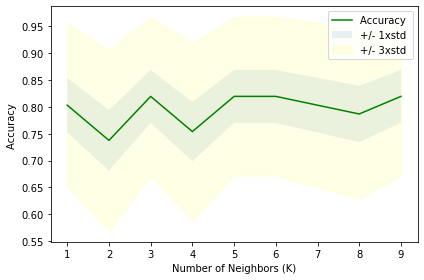

In [18]:
plt.plot(range(1,K),mean_acc,'g')
plt.fill_between(range(1,K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We can see that if our K value is less than 3